# Importowanie Bibliotek
Import niezbędnych bibliotek: TensorFlow, Keras, NumPy, Pandas oraz bibliotek do przetwarzania danych.

In [2]:
# Importowanie Bibliotek
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Przygotowanie Danych
Wczytanie i przygotowanie danych treningowych, normalizacja danych, podział na zbiór treningowy i testowy.

In [4]:
# Przygotowanie Danych

# Wczytanie danych z pliku CSV
data = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = data[numeric_columns].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (zawartości alkoholu)
y = data['ABV'].copy()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Wyświetlenie kształtu zbiorów danych
print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 9)
Kształt danych testowych: (14773, 9)
Kształt etykiet treningowych: (59088,)
Kształt etykiet testowych: (14773,)


In [2]:
# Przygotowanie Danych

# Wczytanie danych z pliku CSV
data = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
X = data[numeric_columns].copy()

# Uzupełnienie brakujących wartości średnią
X = X.fillna(X.mean())

# Przygotowanie etykiet (zawartości alkoholu)
y = data['ABV'].copy()

# Normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Wyświetlenie kształtu zbiorów danych
print("Kształt danych treningowych:", X_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (59088, 9)
Kształt danych testowych: (14773, 9)
Kształt etykiet treningowych: (59088,)
Kształt etykiet testowych: (14773,)


In [5]:
# Utworzenie Modelu
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Warstwa wyjściowa do regresji
])

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Utworzenie Modelu
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Warstwa wyjściowa do regresji
])

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Kompilacja Modelu
model.compile(optimizer='adam',  # Użycie optymalizatora Adam
              loss='mean_squared_error',  # Funkcja straty do regresji
              metrics=['mean_absolute_error'])  # Metryka do oceny modelu

# Wyświetlenie podsumowania modelu
model.summary()  # Podsumowanie architektury modelu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 7.4719 - mean_absolute_error: 1.7607 - val_loss: 2.6524 - val_mean_absolute_error: 1.0340
Epoch 2/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.8146 - mean_absolute_error: 1.0339 - val_loss: 2.5187 - val_mean_absolute_error: 1.0145
Epoch 3/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.7394 - mean_absolute_error: 1.0029 - val_loss: 2.4488 - val_mean_absolute_error: 1.0106
Epoch 4/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.2126 - mean_absolute_error: 0.9144 - val_loss: 1.2019 - val_mean_absolute_error: 0.7720
Epoch 5/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2949 - mean_absolute_error: 0.7626 - val_loss: 0.9788 - val_mean_absolute_error: 0.6755
Epoch 6/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0092 - mean_absolute_error: 0.6879 - val_loss: 0.8079 - val_mean_absolute_error: 0.6195
Epoch 7/50
1478/1478 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8345 - mean_absolute_err

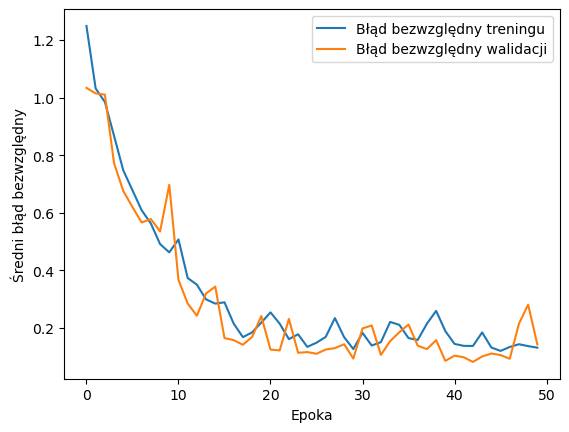

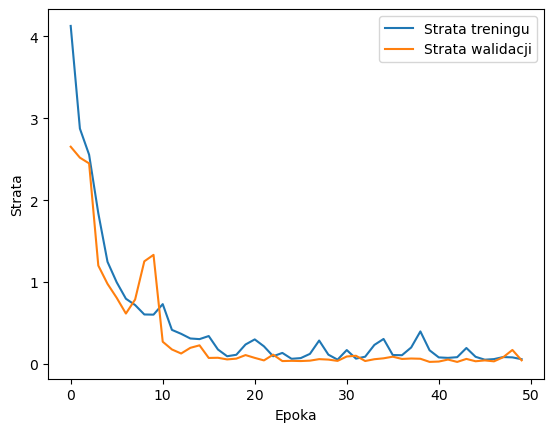

In [7]:
# Trenowanie Modelu

# Trenowanie modelu na danych treningowych z określoną liczbą epok i rozmiarem batcha
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Wykres średniego błędu bezwzględnego
plt.plot(history.history['mean_absolute_error'], label='Błąd bezwzględny treningu')
plt.plot(history.history['val_mean_absolute_error'], label='Błąd bezwzględny walidacji')
plt.xlabel('Epoka')
plt.ylabel('Średni błąd bezwzględny')
plt.legend()
plt.show()

# Wykres straty
plt.plot(history.history['loss'], label='Strata treningu')
plt.plot(history.history['val_loss'], label='Strata walidacji')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.0547 - mean_absolute_error: 0.1501
Test Loss: 0.056781794875860214
Test Mean Absolute Error: 0.14977231621742249
462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step
Mean Squared Error: 0.056781805025110724


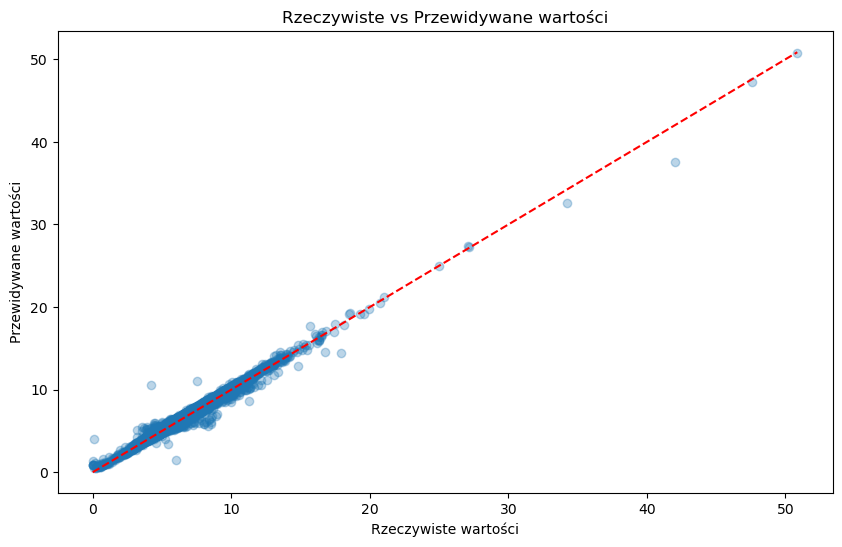

In [8]:
# Testowanie i Ewaluacja

# Ocena modelu na zbiorze testowym
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Mean Absolute Error: {test_mae}')

# Predykcje na zbiorze testowym
y_pred = model.predict(X_test)

# Obliczenie średniego błędu kwadratowego
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Wykres porównujący rzeczywiste i przewidywane wartości
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()

In [9]:
# Zapisywanie Modelu

# Zapisanie wytrenowanego modelu do pliku dla późniejszego wykorzystania
model.save('model_regresji_alkoholu.h5')

# Wczytanie modelu z pliku
loaded_model = keras.models.load_model('model_regresji_alkoholu.h5')

# Sprawdzenie, czy wczytany model działa poprawnie
loaded_model.summary()

# Ocena wczytanego modelu na zbiorze testowym
loaded_test_loss, loaded_test_mae = loaded_model.evaluate(X_test, y_test)

print(f'Loaded Test Loss: {loaded_test_loss}')
print(f'Loaded Test Mean Absolute Error: {loaded_test_mae}')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.52 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

462/462 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - loss: 0.0547 - mean_absolute_error: 0.1501
Loaded Test Loss: 0.056781794875860214
Loaded Test Mean Absolute Error: 0.14977231621742249


In [31]:
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Wczytanie modelu
model = keras.models.load_model('model_regresji_alkoholu.h5')

# Wczytanie rzeczywistych danych treningowych do dopasowania skalera
dane_treningowe = pd.read_csv('data.csv')

# Wybór tylko numerycznych kolumn do treningu
numeric_columns = ['Size(L)', 'OG', 'FG', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency']
dane_treningowe = dane_treningowe[numeric_columns]

# Uzupełnienie brakujących wartości średnią
dane_treningowe = dane_treningowe.fillna(dane_treningowe.mean())

# Normalizacja danych treningowych
scaler = StandardScaler()
scaler.fit(dane_treningowe)

def przewiduj_zawartosc_alkoholu(dane_piwa):
    # Przekształcenie danych wejściowych do odpowiedniego formatu
    df = pd.DataFrame([dane_piwa])
    
    # Normalizacja danych
    df_scaled = scaler.transform(df)
    
    # Przewidywanie zawartości alkoholu
    predykcja = model.predict(df_scaled)
    
    return predykcja[0][0]

# Przykładowe dane dla różnych stylów piwa
piwa = {
    'IPA': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.015, 'IBU': 60, 'Color': 10, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75},
    'Stout': {'Size(L)': 20.0, 'OG': 1.075, 'FG': 1.020, 'IBU': 40, 'Color': 40, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.070, 'Efficiency': 75},
    'Pilsner': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 30, 'Color': 5, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Wheat': {'Size(L)': 20.0, 'OG': 1.055, 'FG': 1.012, 'IBU': 20, 'Color': 8, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.050, 'Efficiency': 75},
    'APA': {'Size(L)': 20.0, 'OG': 1.050, 'FG': 1.010, 'IBU': 35, 'Color': 10, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.045, 'Efficiency': 75},
    'Barleywine': {'Size(L)': 20.0, 'OG': 1.100, 'FG': 1.025, 'IBU': 80, 'Color': 20, 'BoilSize': 25.0, 'BoilTime': 90, 'BoilGravity': 1.095, 'Efficiency': 75},
    'Saison': {'Size(L)': 20.0, 'OG': 1.060, 'FG': 1.008, 'IBU': 25, 'Color': 7, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.055, 'Efficiency': 75},
    'Porter': {'Size(L)': 20.0, 'OG': 1.065, 'FG': 1.018, 'IBU': 35, 'Color': 30, 'BoilSize': 25.0, 'BoilTime': 60, 'BoilGravity': 1.060, 'Efficiency': 75}
}

# Przewidywanie zawartości alkoholu dla każdego stylu piwa
for styl, dane_piwa in piwa.items():
    zawartosc_alkoholu = przewiduj_zawartosc_alkoholu(dane_piwa)
    print(f'Styl: {styl}, Przewidywana zawartość alkoholu: {zawartosc_alkoholu:.2f}%')

# Przykładowe przewidywane wartości zawartości alkoholu dla różnych stylów piwa:
# IPA: około 6.5-7.5%
# Stout: około 5.5-7.0%
# Pilsner: około 4.5-5.5%
# Wheat: około 4.0-5.5%
# APA: około 4.5-6.0%
# Barleywine: około 8.0-12.0%
# Saison: około 5.0-7.0%
# Porter: około 5.0-6.5%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Styl: IPA, Przewidywana zawartość alkoholu: 6.67%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Styl: Stout, Przewidywana zawartość alkoholu: 7.62%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Styl: Pilsner, Przewidywana zawartość alkoholu: 5.34%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Styl: Wheat, Przewidywana zawartość alkoholu: 5.78%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Styl: APA, Przewidywana zawartość alkoholu: 5.38%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Styl: Barleywine, Przewidywana zawartość alkoholu: 9.88%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Styl: Saison, Przewidywana zawartość alkoholu: 6.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Styl: Porter, Przewidywana zawartość alkoholu: 6.50%
